In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


내가 만들어 보기

In [2]:
import pandas as pd
import numpy as np

# handle os specific
import os

# randomization
import random

# visualization imports 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = 17,7
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['axes.titlesize'] = 16
 
# ignore deprecated and future warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)



In [ ]:
# check the root dir
os.listdir('/content/drive/MyDrive/')

['How to get started with Drive.pdf',
 'https:  invite. (1).txt',
 'https:  invite..txt',
 '[CP1]01-202102556-이승훈 (1).zip.zip',
 '[CP1]01-202102556-이승훈.zip.zip',
 '보고서.hwp.pdf',
 '스크린샷(125).png',
 '스크린샷(126).png',
 '스크린샷(127).png',
 'Untitled0.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 '컴과사 2조 3주차.ipynb',
 'Untitled4.ipynb',
 'Untitled6.ipynb',
 'Untitled5.ipynb',
 'Untitled7.ipynb',
 '컴과사.ipynb',
 '컴과사 4월 17일',
 '컴과사 4월 26일',
 'Untitled8.ipynb',
 'Untitled (1)',
 'project4.py',
 '컴과사 실습.ipynb',
 'java-class-09',
 'Untitled9.ipynb',
 'project5_file_cnu.ipynb',
 'Untitled11.ipynb',
 'Untitled10.ipynb',
 'vi.pdf',
 'vi.gdoc',
 'named.caching-nameserver.conf',
 'named.rfc1912.zones',
 '5월 3일',
 'IP복습용',
 'Untitled12.ipynb',
 'Untitled13.ipynb',
 'temp_1634624899891.2014760111.png',
 'temp_1634624899901.2014760111.png',
 'temp_1634624899909.2014760111.png',
 'temp_1634624899915.2014760111.

In [3]:
# set the path
ROOT_DIR = '/content/drive/MyDrive/'
FILE_PATH = os.path.join(ROOT_DIR,'Term_Dataset')
FILE_PATH1 = os.path.join(ROOT_DIR,'Term_Test')

In [7]:
# LIST DIRCTORIES INSIDE THE FILE PATH
os.listdir(FILE_PATH)

['train_data.csv',
 'train_data_emp.csv',
 'val_data.csv',
 'val_data_emp.csv',
 'val',
 'train']

In [4]:
# SET THE TRAINING AND THE TEST PATH
TRAIN_IMAGES = os.path.join(FILE_PATH,'train')
VAL_IMAGES = os.path.join(FILE_PATH,'val')
TEST_IMAGES = os.path.join(FILE_PATH1,'test')

In [8]:
len(os.listdir(TRAIN_IMAGES))

864

In [9]:
len(os.listdir(VAL_IMAGES))

133

In [24]:
len(os.listdir(TEST_IMAGES))

288

In [11]:
# READ THE TRAIN csv FILE CONTAINING THE SPORTS LABEL
train_df = pd.read_csv(os.path.join(FILE_PATH,'train_data.csv'))
train_df.head(10)

,Unnamed: 0,file_name,class
0,0,img00047.png,bag
1,1,img00053.png,bag
2,2,img00052.png,bag
3,3,img00046.png,bag
4,4,img00050.png,bag
5,5,img00044.png,bag
6,6,img00045.png,bag
7,7,img00051.png,bag
8,8,img00055.png,bag
9,9,img00041.png,bag


In [43]:
test_df = pd.read_csv(os.path.join(FILE_PATH1,'test_data_emp.csv'))
test_df.tail()

,Unnamed: 0,file_name,class
283,283,img00288.png,NaN
284,284,img00261.png,NaN
285,285,img00275.png,NaN
286,286,img00274.png,NaN
287,287,img00260.png,NaN


In [32]:
len(train_df['class'].unique())

11

In [ ]:
# Extract the unique labels
sports_labels = train_df['class'].unique()
# LIST THE SPORTS NAME INCLUDED IN THE DATASET
sports_labels

array(['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools',
       'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe'], dtype=object)

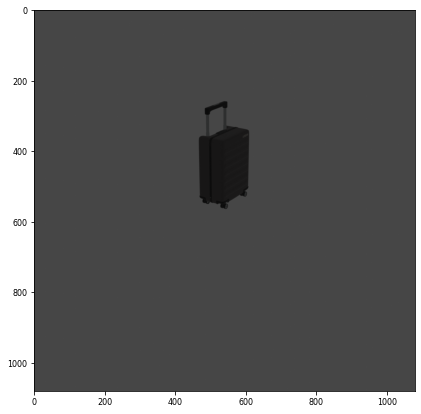

In [ ]:
# CHECK ONE OF THE IMAGES -- > LETS PICK THE FIRST IN THE LIST
plt.imshow(imread(os.path.join(TRAIN_IMAGES, 'img00008.png')));

In [ ]:
# CHECK THE CLASS NAME OF THE DISPLAYED SPORT
train_df['class'][499]

'lamp'

In [ ]:
# IMAGE COUNT PER SPORT
train_df['class'].value_counts()

lamp            126
pot              90
shoe             90
bag              72
bed              72
chair            72
coffeetable      72
cup              72
kitchentools     72
LivingSofa       72
laptop           54
Name: class, dtype: int64

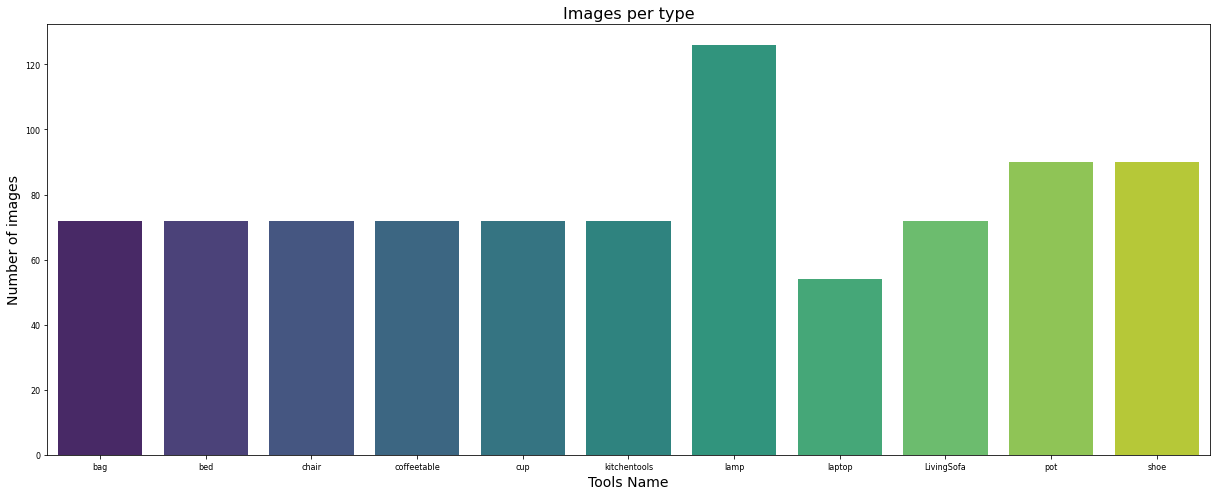

In [ ]:
# VISUALIZE IMAGE COUNT PER SPORT
sns.countplot(train_df['class'],palette='viridis')
plt.title('Images per type',)
plt.ylabel('Number of images')
plt.xlabel('Tools Name')
plt.tight_layout()

In [ ]:
# PICK A RANDOM SPORTS
x = random.randint(0,len(train_df['class'].unique()))
random_sport = sports_labels[x]

sports_show = train_df[train_df['class']==random_sport]
print(f'The selected sport to display various images is {random_sport.upper()}')
sports_show.head()

NameError: ignored

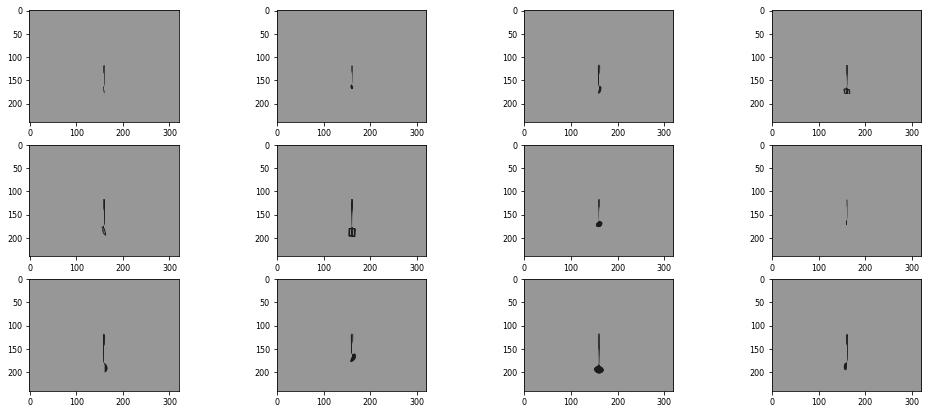

In [ ]:
# DISPLAY THE SPORTS IMAGES --- > NOTICE THE VARIATION IN THE IMAGES OF THE SAME SPORT
n_rows = 3
n_cols = 4

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows,n_cols,index+1)
        # PICK RANDOM IMAGES OF THE SELECTED SPORT
        sport_img = random.randint(0,len(sports_show))
        image_ = plt.imread(os.path.join(TRAIN_IMAGES,sports_show.iloc[sport_img]['file_name']))
        # DISPLAY THE IMAGE
        plt.imshow(image_,cmap='binary',interpolation='nearest')
        #plt.axis('off')
        rcParams['axes.titlesize']= 12
        #plt.title(random_sport)  

In [15]:
IMAGE_SHAPE = (224,224,3)

In [16]:
# IMPORT THE REQUIRED KERAS LIBRARIES FOR IMAGE AUGMENTATION
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
#from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.xception import preprocess_input

In [18]:
image_generator = ImageDataGenerator(    
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.5,
    zoom_range=[0.5,1.8],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=preprocess_input,
    data_format=None,
    validation_split=0.2,
    dtype= 'float32'
)

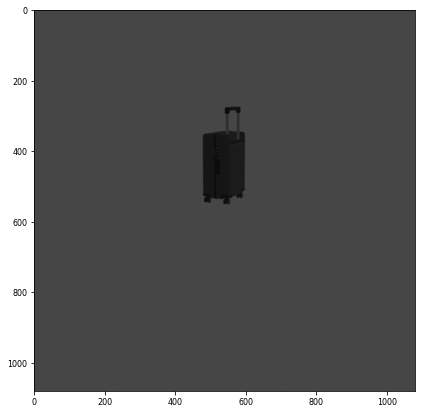

In [ ]:
# DISPLAY THE ORIGINAL AND THE GENERATED IMAGES
image = imread(os.path.join(TRAIN_IMAGES,'img00011.png'))
plt.imshow(image)

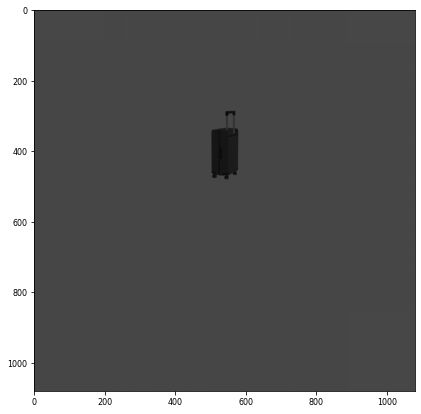

In [ ]:
gen_image = image_generator.random_transform(image)
plt.imshow(gen_image)

In [19]:
# DEFINE THE BATCH SIZE - --- > THIS IS USED AS AN INPUT WHILE FITTING THE MODEL USING GENERATORS
BATCH_SIZE = 8 

In [20]:
# CREATE THE TRAINING GENERATOR 
train_generator = image_generator.flow_from_dataframe(dataframe=train_df,
                                                      directory=TRAIN_IMAGES,
                                                      x_col='file_name',
                                                      y_col='class',
                                                      subset='training',
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      seed=42,
                                                      shuffle=True,
                                                      class_mode='categorical',
                                                      target_size=(224,224))

train_generator

Found 692 validated image filenames belonging to 11 classes.


In [21]:
# CREATE THE VALIDATION GENERATOR 
validation_generator = image_generator.flow_from_dataframe(dataframe=test_df,
                                                           directory=VAL_IMAGES,
                                                           x_col='file_name',
                                                           y_col='class',
                                                           subset='validation',
                                                           color_mode='rgb',
                                                           batch_size=BATCH_SIZE, 
                                                           seed=42,
                                                           shuffle=False, 
                                                           class_mode='categorical',
                                                           target_size=(224,224))

validation_generator

Found 26 validated image filenames belonging to 11 classes.


In [44]:
# TEST GENERATOR ... NO SHUFFLE & CLASS MODE SET TO NONE
test_generator = image_generator.flow_from_dataframe(dataframe=test_df,
                                                     directory=TEST_IMAGES,
                                                     x_col='file_name',
                                                     y_col=None,
                                                     batch_size=BATCH_SIZE,
                                                     color_mode='rgb',
                                                     seed=42,
                                                     shuffle=False, 
                                                     class_mode=None,
                                                     target_size=(224,224))

test_generator

Found 288 validated image filenames.


In [23]:
## IMPORT THE LIBRARIES

from tensorflow import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,AvgPool2D,GlobalMaxPool2D,Flatten,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

In [33]:
trial = 4

In [34]:
if trial==1: # Basic Model
    ## DEFINE THE BASIC MODEL
    model =  Sequential()

    # ADD CONVOLUTIONAL LAYERS and MaxPooling Layer -- > Typical CNN Model
    model.add(Conv2D(filters=32,kernel_size=(7,7),input_shape=IMAGE_SHAPE,strides=1,padding='same',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
        
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    # ADD DENSE LAYERS
    model.add(Flatten())
    model.add(Dense(units=512,activation='relu'))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=11,activation='softmax'))
    
    
    # COMPILE THE BASIC MODEL 
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  
    # PRINT MODEL SUMMARY
    print('BASIC MODEL')
    model.summary()
    
elif trial==2: # Batch Normalization plus selu actiovation and lecun-normal kernel initializer
    model = Sequential()
    
    # Add the CNN layers 
    model.add(Conv2D(filters=32,input_shape=IMAGE_SHAPE,padding='same',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Conv2D(filters=64,padding='same',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(filters=128,padding='same',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    # ADD THE DNN LAYERS
    model.add(Flatten()) # 여기가 뭐지???
    model.add(BatchNormalization())
    
    model.add(Dense(units=256,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=128,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=64,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    model.add(Dense(units=32,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=11,activation='softmax'))
    
    # COMPILE THE MODEL
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    print('Model with Batch Normalization')
    model.summary()
    
elif trial==3:    # VGG16 Pre Trained Model - SGD as well as Adam -- > Adam performs faster and returns better accuracy
    base_model = VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')
    # mark loaded layers as not trainable
    for layer in base_model.layers:
        layer.trainable = False
    # add new classification layers
    flat1 = Flatten()(base_model.layers[-1].output)
    class1 = Dense(512,activation='relu',kernel_initializer='he_normal')(flat1)
    class2 = Dense(256,activation='relu',kernel_initializer='he_normal')(class1)
    class3 = Dense(128,activation='relu',kernel_initializer='he_normal')(class2)
    output = Dense(11,activation='softmax')(class3)
    # define new model
    model = Model(inputs=base_model.inputs,outputs=output)
    #compile the model
    # opt = SGD(lr=0.001,momentum=0.9,nesterov=True)
    opt = Adam(lr=0.00001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
    print('Transfer Learning based on VGG16')
    model.summary()
    
else:
    base_model = Xception(include_top=False,input_shape=(224,224,3),weights='imagenet')
    # mark loaded layers as not trainable
    for layer in base_model.layers:
        layer.trainable = False
    # add new classification layers
    #avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
    flat1 = Flatten()(base_model.layers[-1].output)
    class1 = Dense(512,activation='relu',kernel_initializer='he_normal')(flat1)
    class2 = Dense(256,activation='relu',kernel_initializer='he_normal')(class1)
    class3 = Dense(128,activation='relu',kernel_initializer='he_normal')(class2)
    output = Dense(11,activation='softmax')(class3)
     # define new model
    model = Model(inputs=base_model.inputs,outputs=output)
    #compile the model
    # opt = SGD(lr=0.001,momentum=0.9,nesterov=True)
    opt = Adam(lr=0.00001) # learning rate 도 손봐야된다아
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
    
    print('Transfer Learning based on Xception Module')
    model.summary() 

83697664/83683744 [==============================] - 0s 0us/step
Transfer Learning based on Xception Module
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)                                                                                        
                                                                                                  
 conv2d_2 (Conv2D)              (None, 14, 14, 728)  186368      ['add_1[0][0]']                  
                                                                                                  
 block4_pool (MaxPooling2D)     (None, 14, 14, 728)  0           ['block4_sepconv2_bn[0][0]']     
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 14, 14, 728)  2912       ['conv2d_2[0][0]']               
 rmalization)                                                                                     
          

In [35]:
# DEFINE CALLBACKS ---- > EARLY STOP AND REDUCE LEARNING RATE ON PLATEAU
early_stop = EarlyStopping(patience=15,monitor='val_loss',restore_best_weights=True)

In [36]:
# DEFINE THE STEPS_PER_EPOCH
STEP_SIZE_TRAIN = (train_generator.n // train_generator.batch_size)   
STEP_SIZE_VALIDATION = (validation_generator.n // validation_generator.batch_size)   # 가진 데이터 수보다 배치 사이즈가 커서 검증이 안되어서 warning이 뜬거였어...
STEP_SIZE_TEST = (test_generator.n // test_generator.batch_size) 

In [37]:
 # TRAIN THE MODEL 

model.fit(train_generator, validation_data=validation_generator, 
steps_per_epoch=STEP_SIZE_TRAIN, validation_steps=STEP_SIZE_VALIDATION,
callbacks=[early_stop], 
epochs=40)



Epoch 1/40
86/86 [==============================] - 212s 2s/step - loss: 2.2536 - accuracy: 0.1769 - val_loss: 3.6923 - val_accuracy: 0.0000e+00
Epoch 2/40
86/86 [==============================] - 92s 1s/step - loss: 2.1574 - accuracy: 0.2120 - val_loss: 4.1295 - val_accuracy: 0.0000e+00
Epoch 3/40
86/86 [==============================] - 96s 1s/step - loss: 2.1102 - accuracy: 0.2368 - val_loss: 4.5019 - val_accuracy: 0.0000e+00
Epoch 4/40
86/86 [==============================] - 94s 1s/step - loss: 2.0744 - accuracy: 0.2412 - val_loss: 4.7555 - val_accuracy: 0.0000e+00
Epoch 5/40
86/86 [==============================] - 96s 1s/step - loss: 2.0503 - accuracy: 0.2515 - val_loss: 4.8953 - val_accuracy: 0.0000e+00
Epoch 6/40
86/86 [==============================] - 93s 1s/step - loss: 2.0143 - accuracy: 0.2529 - val_loss: 5.1064 - val_accuracy: 0.0000e+00
Epoch 7/40
86/86 [==============================] - 94s 1s/step - loss: 1.9992 - accuracy: 0.2471 - val_loss: 5.3368 - val_accuracy: 0.

In [39]:
base_model.trainable = True
opt = Adam(lr=0.000001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')


model.fit_generator(generator=train_generator,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=validation_generator,
                   validation_steps=STEP_SIZE_VALIDATION,
                   epochs=16,
                   callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/16
86/86 [==============================] - 409s 5s/step - loss: 2.2827 - accuracy: 0.1930 - val_loss: 2.6537 - val_accuracy: 0.0000e+00
Epoch 2/16
86/86 [==============================] - 387s 4s/step - loss: 1.9575 - accuracy: 0.4240 - val_loss: 2.5048 - val_accuracy: 0.0000e+00
Epoch 3/16
86/86 [==============================] - 393s 5s/step - loss: 1.7308 - accuracy: 0.5088 - val_loss: 2.6419 - val_accuracy: 0.0000e+00
Epoch 4/16
86/86 [==============================] - 385s 4s/step - loss: 1.4592 - accuracy: 0.6330 - val_loss: 2.8447 - val_accuracy: 0.0000e+00
Epoch 5/16
86/86 [==============================] - 379s 4s/step - loss: 1.2200 - accuracy: 0.7105 - val_loss: 3.3839 - val_accuracy: 0.0833
Epoch 6/16
86/86 [==============================] - 374s 4s/step - loss: 0.9996 - accuracy: 0.7807 - val_loss: 4.0849 - val_accuracy: 0.0417
Epoch 7/16
86/86 [==============================] - 374s 4s/step - loss: 0.7769 - accuracy: 0.8450 - val_loss: 4.9192 - val_accuracy: 0.08

In [40]:
# EVALUATE THE MODEL ... 
model.evaluate_generator(generator=validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[6.758679389953613, 0.1538461595773697]

In [ ]:
data_generator = ImageDataGenerator(    
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.5,
    zoom_range=[0.5,1.8],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=preprocess_input,
    data_format=None,
    validation_split=0.0,
    dtype= 'float32'
) 

In [ ]:
train_generator_full = data_generator.flow_from_dataframe(dataframe=train_df,
                                                      directory=TRAIN_IMAGES,
                                                      x_col='file_name',
                                                      y_col='class',
                                                      subset='training',
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      seed=42,
                                                      shuffle=True, 
                                                      class_mode='categorical',
                                                      target_size=(224,224))

train_generator_full

Found 864 validated image filenames belonging to 11 classes.


In [ ]:
model.fit(train_generator_full,
                   steps_per_epoch=train_generator_full.n//train_generator_full.batch_size,
                   epochs=20,
                   callbacks=[early_stop]
                   )

Epoch 1/40
108/108 [==============================] - 406s 4s/step - loss: 1.9985 - accuracy: 0.3831
Epoch 2/40
108/108 [==============================] - 409s 4s/step - loss: 1.6767 - accuracy: 0.5394
Epoch 3/40
108/108 [==============================] - 409s 4s/step - loss: 1.4138 - accuracy: 0.6331
Epoch 4/40
108/108 [==============================] - 409s 4s/step - loss: 1.1707 - accuracy: 0.7396
Epoch 5/40
108/108 [==============================] - 408s 4s/step - loss: 0.9575 - accuracy: 0.7824
Epoch 6/40
108/108 [==============================] - 406s 4s/step - loss: 0.8150 - accuracy: 0.8194
Epoch 7/40
108/108 [==============================] - 403s 4s/step - loss: 0.6704 - accuracy: 0.8565
Epoch 8/40
108/108 [==============================] - 401s 4s/step - loss: 0.5941 - accuracy: 0.8704
Epoch 9/40
108/108 [==============================] - 402s 4s/step - loss: 0.5141 - accuracy: 0.8970
Epoch 10/40
108/108 [==============================] - 404s 4s/step - loss: 0.4423 - accura

In [ ]:
# 모델 저장을 했어야 됌...

In [41]:
# RESET THE GENERATOR TO GET THE RESULTS IN THE RIGHT ORDER
test_generator.reset()


In [45]:
# GENERATE PREDICTIONS ON THE TEST DATA
predictions = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [46]:
# RETRIEVE THE CLASS INDEX FOR WHICH THE PROBABILITY IS MAXIMUM ...hence np.argmax
predictions_class_index = np.argmax(predictions,axis=1)

In [47]:
# CHECK THE PREDICTED CLASS INDICES
predictions_class_index

array([10, 10, 10, 10,  0, 10,  0,  0, 10,  3,  9, 10, 10, 10,  7,  7,  9,
        0,  8,  8, 10,  0, 10,  8,  0,  4,  3,  0,  0,  8,  4,  8,  7,  7,
        7,  0,  0,  8,  0,  0,  7, 10,  0, 10,  7,  7,  7,  4,  3,  3,  3,
        3,  3,  3,  3,  3,  7,  3,  3,  3,  3,  8,  3,  3,  3,  3,  3,  3,
        3,  7,  3,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  4,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        0,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  6,  0,  8,  8,  8,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [48]:
# EXTRACT THE PREDICTION LABELS
label = (train_generator.class_indices)
label = dict((v,k) for k,v in label.items())
final_predictions = [label[k] for k in predictions_class_index]

In [49]:
# LIST THE FINAL PREDICTED LABELS
final_predictions

['shoe',
 'shoe',
 'shoe',
 'shoe',
 'LivingSofa',
 'shoe',
 'LivingSofa',
 'LivingSofa',
 'shoe',
 'chair',
 'pot',
 'shoe',
 'shoe',
 'shoe',
 'lamp',
 'lamp',
 'pot',
 'LivingSofa',
 'laptop',
 'laptop',
 'shoe',
 'LivingSofa',
 'shoe',
 'laptop',
 'LivingSofa',
 'coffeetable',
 'chair',
 'LivingSofa',
 'LivingSofa',
 'laptop',
 'coffeetable',
 'laptop',
 'lamp',
 'lamp',
 'lamp',
 'LivingSofa',
 'LivingSofa',
 'laptop',
 'LivingSofa',
 'LivingSofa',
 'lamp',
 'shoe',
 'LivingSofa',
 'shoe',
 'lamp',
 'lamp',
 'lamp',
 'coffeetable',
 'chair',
 'chair',
 'chair',
 'chair',
 'chair',
 'chair',
 'chair',
 'chair',
 'lamp',
 'chair',
 'chair',
 'chair',
 'chair',
 'laptop',
 'chair',
 'chair',
 'chair',
 'chair',
 'chair',
 'chair',
 'chair',
 'lamp',
 'chair',
 'LivingSofa',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'coffeetable',
 'cof

In [50]:
len(final_predictions)

288

In [51]:
# PREPARE FOR SUBMISSION
filenames=test_generator.filenames
results=pd.DataFrame({"file_name":filenames,
                      "class":final_predictions})
results.to_csv("submission.csv",index=False)

In [52]:
final_df = pd.read_csv('/content/submission.csv')
final_df

,file_name,class
0,img00018.png,shoe
1,img00024.png,shoe
2,img00019.png,shoe
3,img00022.png,shoe
4,img00023.png,LivingSofa
...,...,...
283,img00288.png,shoe
284,img00261.png,shoe
285,img00275.png,shoe
286,img00274.png,shoe


In [53]:
compare_df = pd.read_csv('/content/drive/MyDrive/Term_Test/test_data_emp.csv', index_col='Unnamed: 0')
compare_df

,file_name,class
0,img00018.png,NaN
1,img00024.png,NaN
2,img00019.png,NaN
3,img00022.png,NaN
4,img00023.png,NaN
...,...,...
283,img00288.png,NaN
284,img00261.png,NaN
285,img00275.png,NaN
286,img00274.png,NaN


In [54]:
for i in range(0, len(final_predictions)):
  for j in range(0, len(final_predictions)):
    if(final_df['file_name'][i] == compare_df['file_name'][j]):
      compare_df['class'][j]=final_df['class'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [55]:
compare_df

,file_name,class
0,img00018.png,shoe
1,img00024.png,shoe
2,img00019.png,shoe
3,img00022.png,shoe
4,img00023.png,LivingSofa
...,...,...
283,img00288.png,shoe
284,img00261.png,shoe
285,img00275.png,shoe
286,img00274.png,shoe


In [56]:
compare_df.to_csv("JAVIS.csv",index=True)